In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

`Loading both sets of data`

In [20]:
p_ = r"/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/src/data/combined_datasets"
combined_df = pd.read_csv(p_)
p = "/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/src/data/variables_target_file"
sampled_df = pd.read_csv(p)
col = sampled_df.columns[:-3].values

In [21]:
sampled_df.head()

,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,...,Lu,Hf,Ta,Th,U,Cr,Ni,LATITUDE,LONGITUDE,Tectonic_setting
0,49.840,0.690,19.520,9.58,0.190,5.830,11.810,1.250,0.030,0.030,...,0.210000,0.610000,0.012000,0.080000,0.037000,89.000000,31.800000,43.88000,145.53000,IAB
1,49.684,1.243,16.292,9.88,0.156,5.446,9.331,2.906,1.368,0.387,...,0.506941,4.048274,0.306222,1.560400,0.995827,162.629578,55.026173,55.82190,160.23630,IAB
2,50.437,1.328,17.051,9.35,0.136,4.771,9.144,3.202,1.524,0.414,...,0.521601,4.423565,0.344621,1.751808,1.119837,112.968681,47.489128,55.81992,160.39200,IAB
3,50.880,1.384,16.976,9.69,0.153,4.588,8.533,3.281,1.786,0.482,...,0.565124,4.716979,0.353370,1.869443,1.182308,102.395943,40.964020,55.81042,160.36475,IAB
4,50.845,1.913,16.231,10.11,0.154,3.535,7.915,3.498,2.180,0.647,...,0.717250,6.677058,0.393347,2.643277,1.661968,28.622011,22.113792,55.81600,160.38636,IAB


In [22]:
len(sampled_df["Tectonic_setting"])

6368

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


binary_val = label_encoder.fit_transform(sampled_df["Tectonic_setting"])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = binary_val.reshape(len(binary_val), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [18]:
onehot_encoded = np.array(onehot_encoded)
onehot_encoded

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [12]:
len(onehot_encoded)

6368

In [13]:
sampled_df["Tectonic_setting"] = onehot_encoded
sampled_df.head()

,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,...,Lu,Hf,Ta,Th,U,Cr,Ni,LATITUDE,LONGITUDE,Tectonic_setting
0,49.840,0.690,19.520,9.58,0.190,5.830,11.810,1.250,0.030,0.030,...,0.210000,0.610000,0.012000,0.080000,0.037000,89.000000,31.800000,43.88000,145.53000,1.0
1,49.684,1.243,16.292,9.88,0.156,5.446,9.331,2.906,1.368,0.387,...,0.506941,4.048274,0.306222,1.560400,0.995827,162.629578,55.026173,55.82190,160.23630,1.0
2,50.437,1.328,17.051,9.35,0.136,4.771,9.144,3.202,1.524,0.414,...,0.521601,4.423565,0.344621,1.751808,1.119837,112.968681,47.489128,55.81992,160.39200,1.0
3,50.880,1.384,16.976,9.69,0.153,4.588,8.533,3.281,1.786,0.482,...,0.565124,4.716979,0.353370,1.869443,1.182308,102.395943,40.964020,55.81042,160.36475,1.0
4,50.845,1.913,16.231,10.11,0.154,3.535,7.915,3.498,2.180,0.647,...,0.717250,6.677058,0.393347,2.643277,1.661968,28.622011,22.113792,55.81600,160.38636,1.0


In [14]:
sampled_df["Tectonic_setting"]


0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6363    0.0
6364    0.0
6365    0.0
6366    0.0
6367    0.0
Name: Tectonic_setting, Length: 6368, dtype: float64

`Standarizing the data`

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standard = scaler.fit_transform(sampled_df[col])
sampled_df[col] = x_standard
combined_df[col] = x_standard

`data counts first look`

<BarContainer object of 3 artists>

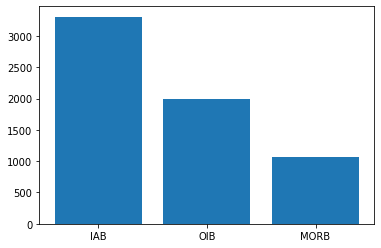

In [25]:
t = sampled_df.Tectonic_setting.value_counts()
plt.bar(t.index, t.values)

In [ ]:
t

`balancing the data via random oversampler`

In [26]:
from sklearn.model_selection import train_test_split
# X = sampled_df[col], y = sampled_df["Tectonic_setting"]
X_train, X_test, y_train, y_test = train_test_split(sampled_df[col],sampled_df["Tectonic_setting"],\
                                                    test_size=0.3, random_state=100)

In [27]:
y_train

6114    MORB
149      IAB
1377     IAB
2201     IAB
6156    MORB
        ... 
6026    MORB
79       IAB
3927     IAB
5955    MORB
5640    MORB
Name: Tectonic_setting, Length: 4457, dtype: object

In [32]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_bal, y_bal = over_sampler.fit_resample(X_train, y_train)


<AxesSubplot:>

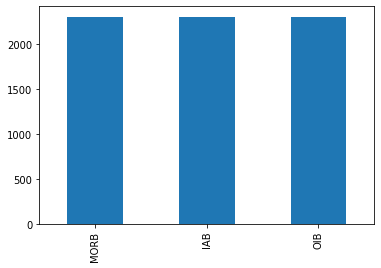

In [33]:
y_bal.value_counts().plot(kind='bar')

In [30]:
sampled_df[col].columns

Index(['SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O',
       'P2O5', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm',
       'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th',
       'U', 'Cr', 'Ni'],
      dtype='object')

# Feature importance with Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
labels = sampled_df[col].columns.to_list()
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(X_bal, y_bal)
feature_importance = rf.feature_importances_
indices = np.argsort(feature_importance)[::-1]

In [36]:
print(len(feature_importance), len(labels))

36 36


In [41]:

X_res.shape[1]

36

In [38]:
y_result= rf.predict(X_test)
y_result

array(['OIB', 'OIB', 'IAB', ..., 'IAB', 'IAB', 'MORB'], dtype=object)

In [44]:
sampled_df["Tectonic_setting"]

0        IAB
1        IAB
2        IAB
3        IAB
4        IAB
        ... 
6363    MORB
6364    MORB
6365    MORB
6366    MORB
6367    MORB
Name: Tectonic_setting, Length: 6368, dtype: object

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_result))


              precision    recall  f1-score   support

         IAB       0.96      0.95      0.96      1003
        MORB       0.92      0.85      0.88       328
         OIB       0.91      0.96      0.94       580

    accuracy                           0.94      1911
   macro avg       0.93      0.92      0.93      1911
weighted avg       0.94      0.94      0.94      1911



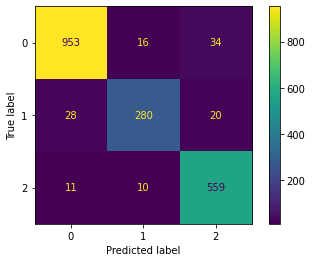

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_result)
cm_display =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix) #,display_labels = [False, True])
cm_display.plot()
plt.show()

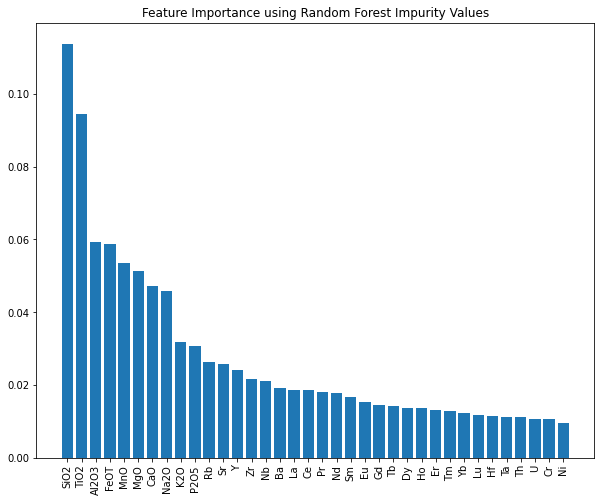

In [58]:
plt.figure(figsize= (10,8))
plt.title("Feature Importance using Random Forest Impurity Values")
plt.bar(range(X_res.shape[1]),feature_importance[indices], align = 'center')
plt.xticks(range(X_res.shape[1]), labels, rotation = 90)
plt.show()